# Dynamic Momentum Index (DMI)

https://www.fmlabs.com/reference/default.htm?url=DMI.htm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'LT.NS'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,1308.400024,1318.900024,1303.000000,1309.949951,1226.583862,3123998
2020-01-02 00:00:00+05:30,1312.000000,1348.000000,1311.000000,1345.300049,1259.684448,4335359
2020-01-03 00:00:00+05:30,1344.949951,1344.949951,1330.150024,1335.050049,1250.086670,2059871
2020-01-06 00:00:00+05:30,1331.000000,1332.000000,1314.099976,1316.750000,1232.951172,2646905
2020-01-07 00:00:00+05:30,1328.000000,1339.500000,1313.750000,1320.500000,1236.462524,2077893


In [3]:
df['sd'] = df['Adj Close'].rolling(5).std()
df['asd'] = df['sd'].rolling(10).mean()
df['DMI'] = 14/(df['sd']/df['asd'])
df = df.drop(['sd', 'asd'], axis=1)

In [4]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,DMI
Date,,,,,,,
2020-01-01 00:00:00+05:30,1308.400024,1318.900024,1303.000000,1309.949951,1226.583862,3123998,NaN
2020-01-02 00:00:00+05:30,1312.000000,1348.000000,1311.000000,1345.300049,1259.684448,4335359,NaN
2020-01-03 00:00:00+05:30,1344.949951,1344.949951,1330.150024,1335.050049,1250.086670,2059871,NaN
2020-01-06 00:00:00+05:30,1331.000000,1332.000000,1314.099976,1316.750000,1232.951172,2646905,NaN
2020-01-07 00:00:00+05:30,1328.000000,1339.500000,1313.750000,1320.500000,1236.462524,2077893,NaN
2020-01-08 00:00:00+05:30,1302.000000,1308.699951,1283.349976,1291.550049,1209.355103,4147568,NaN
2020-01-09 00:00:00+05:30,1311.000000,1319.900024,1305.099976,1316.150024,1232.389404,2067779,NaN
2020-01-10 00:00:00+05:30,1319.000000,1335.949951,1319.000000,1324.599976,1240.301636,2360798,NaN
2020-01-13 00:00:00+05:30,1329.000000,1339.400024,1328.699951,1334.699951,1249.758911,1825244,NaN


Text(0.5, 0, 'Date')

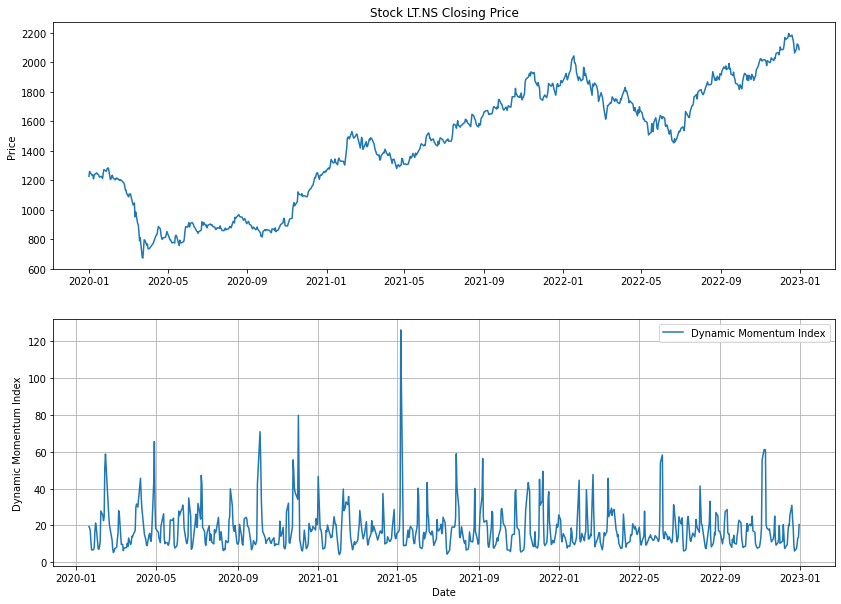

In [5]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['DMI'], label='Dynamic Momentum Index')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Dynamic Momentum Index')
ax2.set_xlabel('Date')

## Candlestick with Dynamic Momentum Index 

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DMI,VolumePositive
0,18261.770833,1308.400024,1318.900024,1303.000000,1309.949951,1226.583862,3123998,NaN,False
1,18262.770833,1312.000000,1348.000000,1311.000000,1345.300049,1259.684448,4335359,NaN,False
2,18263.770833,1344.949951,1344.949951,1330.150024,1335.050049,1250.086670,2059871,NaN,False
3,18266.770833,1331.000000,1332.000000,1314.099976,1316.750000,1232.951172,2646905,NaN,False
4,18267.770833,1328.000000,1339.500000,1313.750000,1320.500000,1236.462524,2077893,NaN,False


Text(0.5, 0, 'Date')

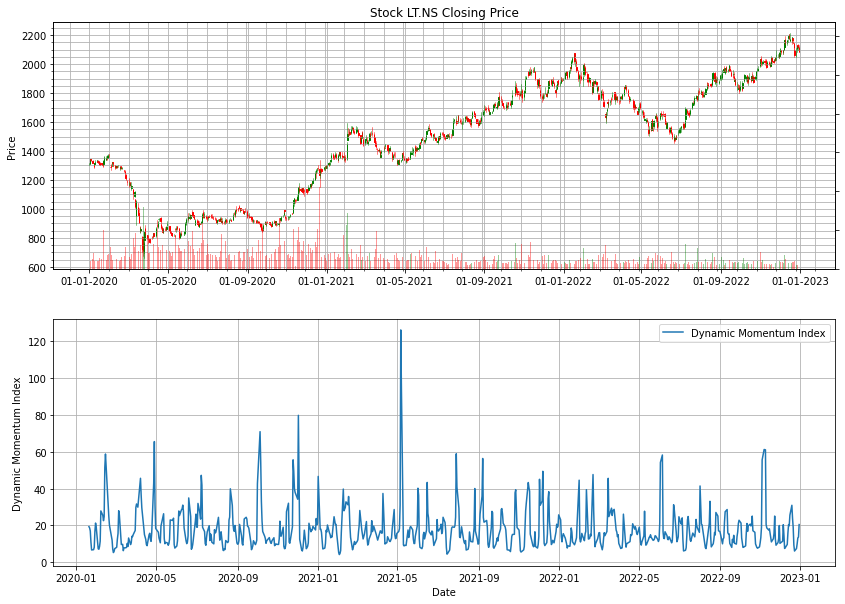

In [8]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['DMI'], label='Dynamic Momentum Index')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Dynamic Momentum Index')
ax2.set_xlabel('Date')